In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [8]:
torch.cuda.is_available()

True

# Synthetic Data Generation

In [2]:
N=20
X=np.random.random(N)*10 -5
Y =0.5* X -1 #+np.random.randn(N)

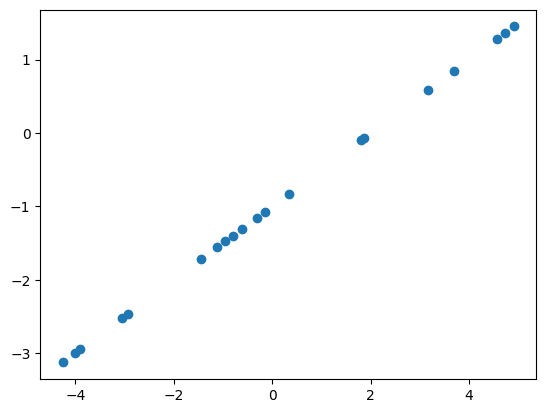

In [ ]:
plt.scatter(X,Y)

# Define the Model

In [12]:
model=nn.Linear(1,1)

In [13]:
#Loss and optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.025)

# Data Preprocessing

In [4]:
X = X.reshape(N,1)
Y = Y.reshape(N,1)

inputs=torch.from_numpy(X.astype(np.float32))
targets=torch.from_numpy(Y.astype(np.float32))


In [17]:
#Train the model
n_epochs = 50
losses =[]
for it in range(n_epochs):
    optimizer.zero_grad()
    
    #Forward pass
    outputs=model(inputs)
    loss=criterion(outputs,targets)
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')
    

Epoch 1/50, Loss: 0.0188
Epoch 2/50, Loss: 0.0169
Epoch 3/50, Loss: 0.0153
Epoch 4/50, Loss: 0.0138
Epoch 5/50, Loss: 0.0125
Epoch 6/50, Loss: 0.0112
Epoch 7/50, Loss: 0.0101
Epoch 8/50, Loss: 0.0092
Epoch 9/50, Loss: 0.0083
Epoch 10/50, Loss: 0.0075
Epoch 11/50, Loss: 0.0067
Epoch 12/50, Loss: 0.0061
Epoch 13/50, Loss: 0.0055
Epoch 14/50, Loss: 0.0050
Epoch 15/50, Loss: 0.0045
Epoch 16/50, Loss: 0.0040
Epoch 17/50, Loss: 0.0036
Epoch 18/50, Loss: 0.0033
Epoch 19/50, Loss: 0.0030
Epoch 20/50, Loss: 0.0027
Epoch 21/50, Loss: 0.0024
Epoch 22/50, Loss: 0.0022
Epoch 23/50, Loss: 0.0020
Epoch 24/50, Loss: 0.0018
Epoch 25/50, Loss: 0.0016
Epoch 26/50, Loss: 0.0014
Epoch 27/50, Loss: 0.0013
Epoch 28/50, Loss: 0.0012
Epoch 29/50, Loss: 0.0011
Epoch 30/50, Loss: 0.0010
Epoch 31/50, Loss: 0.0009
Epoch 32/50, Loss: 0.0008
Epoch 33/50, Loss: 0.0007
Epoch 34/50, Loss: 0.0006
Epoch 35/50, Loss: 0.0006
Epoch 36/50, Loss: 0.0005
Epoch 37/50, Loss: 0.0005
Epoch 38/50, Loss: 0.0004
Epoch 39/50, Loss: 0.

In [20]:
model(inputs)

tensor([[-3.3975],
        [ 0.0156],
        [ 1.3879],
        [ 1.2353],
        [-1.8644],
        [-2.5186],
        [-2.8362],
        [ 1.1035],
        [-2.9950],
        [ 0.4189],
        [-2.2846],
        [-2.9598],
        [ 0.7497],
        [-0.6094],
        [-0.7229],
        [-1.9331],
        [-0.9734],
        [-1.8315],
        [ 1.1091],
        [-1.7908]], grad_fn=<AddmmBackward0>)

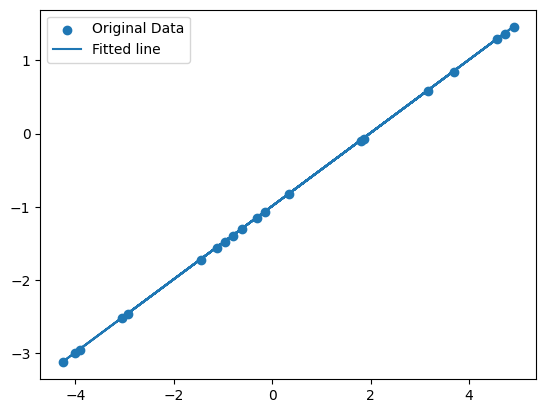

In [6]:
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y,label="Original Data")
plt.plot(X, predicted, label="Fitted line")
plt.legend()
plt.show()

In [17]:
with torch.no_grad():
    out = model(inputs).numpy()
out

array([[-0.02401382],
       [ 1.2008209 ],
       [ 0.9403403 ],
       [ 1.4644232 ],
       [ 0.78906465],
       [-0.88926303],
       [-0.11648279],
       [-1.3168089 ],
       [-3.2084317 ],
       [ 0.40212142],
       [-0.83926874],
       [ 0.6803943 ],
       [-2.1076205 ],
       [-0.95741403],
       [-2.5603032 ],
       [-2.1381993 ],
       [-1.5179304 ],
       [ 0.1806289 ],
       [-0.4000848 ],
       [-1.8281538 ]], dtype=float32)

In [12]:
model(inputs).detach().numpy()

array([[ 0.26446092],
       [-2.1705837 ],
       [-2.4211328 ],
       [ 1.1018643 ],
       [-2.1739972 ],
       [-2.479529  ],
       [-1.0520664 ],
       [-1.8950391 ],
       [-1.947543  ],
       [ 1.0648403 ],
       [-1.9600511 ],
       [-2.6329396 ],
       [-3.3516788 ],
       [ 0.67714524],
       [ 1.0114604 ],
       [-3.3354108 ],
       [ 1.4012725 ],
       [-3.2181945 ],
       [ 0.14951122],
       [ 0.6460284 ]], dtype=float32)

In [21]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.50010735]] [-0.9894289]


# Saving Entire Model

In [22]:
torch.save(model,"one.pt")

In [5]:
model=torch.load("one.pt")
#The disadvantage of this approach is that the data is bound to the specific classes and the exact directory structure used when the model is saved.

# Saving State Dictionary

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([[0.5001]])), ('bias', tensor([-0.9894]))])

In [8]:
torch.save(model.state_dict(),"one.pt")

In [9]:
model=nn.Linear(1,1)
model.load_state_dict(torch.load("one.pt"))
model.eval()

Linear(in_features=1, out_features=1, bias=True)